#**Questão 01**

#Item A

In [1]:
import numpy as np
import plotly.graph_objects as go
from skimage.measure import marching_cubes

# === 1. Cano Reto via Faces ===
def cano_reto(raio_ext=1.0, raio_int=0.7, comprimento=5.0, n_lados=50):
    theta = np.linspace(0, 2 * np.pi, n_lados + 1)
    x_ext = raio_ext * np.cos(theta)
    y_ext = raio_ext * np.sin(theta)
    x_int = raio_int * np.cos(theta)
    y_int = raio_int * np.sin(theta)
    z0 = np.zeros(n_lados + 1)
    z1 = np.full(n_lados + 1, comprimento)

    V = np.vstack([
        np.column_stack([x_ext, y_ext, z0]),
        np.column_stack([x_ext, y_ext, z1]),
        np.column_stack([x_int, y_int, z0]),
        np.column_stack([x_int, y_int, z1])
    ])

    F = []
    for i in range(n_lados):
        i_next = (i + 1) % (n_lados + 1)

        vi0 = i + 2 * (n_lados + 1)
        vi1 = i_next + 2 * (n_lados + 1)
        vi2 = i_next + 3 * (n_lados + 1)
        vi3 = i + 3 * (n_lados + 1)

        F.append([vi3, vi1, vi0])
        F.append([vi3, vi2, vi1])

    return V, F

# === 2. Cano Reto via Marching Cubes ===
def func_parede_interna(x, y, z, raio_int=0.7, comprimento=5.0):
    r2 = x**2 + y**2
    dentro_altura = np.logical_and(z >= 0, z <= comprimento)
    f = r2 - raio_int**2
    return np.where(dentro_altura, f, 1.0)

def gerar_malha_parede_interna(res=60):
    x = np.linspace(-1.5, 1.5, res)
    y = np.linspace(-1.5, 1.5, res)
    z = np.linspace(0, 5.0, res)
    X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

    vol = func_parede_interna(X, Y, Z)

    spacing = (x[1] - x[0], y[1] - y[0], z[1] - z[0])
    verts, faces, _, _ = marching_cubes(vol, level=0.0, spacing=spacing)

    offset = np.array([x[0], y[0], z[0]])
    verts += offset

    return verts, faces

# === 3. Função de plotagem Plotly ===
def plot_mesh_plotly(V, F, titulo, cor):
    fig = go.Figure(data=[
        go.Mesh3d(
            x=V[:, 0], y=V[:, 1], z=V[:, 2],
            i=np.array(F)[:, 0],
            j=np.array(F)[:, 1],
            k=np.array(F)[:, 2],
            color=cor,
            opacity=0.7
        )
    ])
    fig.update_layout(
        title=titulo,
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z',
            aspectmode='data'
        ),
        margin=dict(l=0, r=0, t=40, b=0)
    )
    fig.show()

# === Execução ===
if __name__ == "__main__":
    try:
        # 1. Faces diretas
        V1, F1 = cano_reto()
        plot_mesh_plotly(V1, F1, "Cano Reto – Malha Direta", "skyblue")

        # 2. Marching Cubes
        V2, F2 = gerar_malha_parede_interna()
        plot_mesh_plotly(V2, F2, "Cano Reto – Marching Cubes", "orange")
    except Exception as e:
        print("Erro ao executar:", e)

In [ ]:
def obter_matriz_cano_reto():
    """
    Função independente que retorna a matriz de vértices e arestas
    do cano reto (somente faces internas).

    Retorna:
        matriz_vertices: ndarray (N x 3)
        matriz_arestas: lista de triângulos (faces) com índices de vértices
    """
    # Usa a função principal para gerar o sólido
    matriz_vertices, matriz_arestas = cano_reto()

    return matriz_vertices, matriz_arestas

V, F = obter_matriz_cano_reto()

print("Matriz de vértices:")
print(V)

print("\nMatriz de arestas:")
print(F)

Matriz de vértices:
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 9.92114701e-01  1.25333234e-01  0.00000000e+00]
 [ 9.68583161e-01  2.48689887e-01  0.00000000e+00]
 [ 9.29776486e-01  3.68124553e-01  0.00000000e+00]
 [ 8.76306680e-01  4.81753674e-01  0.00000000e+00]
 [ 8.09016994e-01  5.87785252e-01  0.00000000e+00]
 [ 7.28968627e-01  6.84547106e-01  0.00000000e+00]
 [ 6.37423990e-01  7.70513243e-01  0.00000000e+00]
 [ 5.35826795e-01  8.44327926e-01  0.00000000e+00]
 [ 4.25779292e-01  9.04827052e-01  0.00000000e+00]
 [ 3.09016994e-01  9.51056516e-01  0.00000000e+00]
 [ 1.87381315e-01  9.82287251e-01  0.00000000e+00]
 [ 6.27905195e-02  9.98026728e-01  0.00000000e+00]
 [-6.27905195e-02  9.98026728e-01  0.00000000e+00]
 [-1.87381315e-01  9.82287251e-01  0.00000000e+00]
 [-3.09016994e-01  9.51056516e-01  0.00000000e+00]
 [-4.25779292e-01  9.04827052e-01  0.00000000e+00]
 [-5.35826795e-01  8.44327926e-01  0.00000000e+00]
 [-6.37423990e-01  7.70513243e-01  0.00000000e+00]
 [-7.289686

#Item B

In [9]:
import numpy as np
import plotly.graph_objects as go
from skimage.measure import marching_cubes
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# === Funções para geração do cano ===

def bezier_cubic(t, P0, P1, P2, P3):
    return ((1 - t)**3) * P0 + 3 * ((1 - t)**2) * t * P1 + 3 * (1 - t) * (t**2) * P2 + (t**3) * P3

def gerar_curva_bezier(P0, P1, P2, P3, n=100):
    ts = np.linspace(0, 1, n)
    return np.array([bezier_cubic(t, P0, P1, P2, P3) for t in ts])

def cano_curvado_bezier(P0, P1, P2, P3, raio=0.3, n_segmentos=50, n_lados=20):
    ts = np.linspace(0, 1, n_segmentos)
    pontos = np.array([bezier_cubic(t, P0, P1, P2, P3) for t in ts])
    V = []

    for i in range(n_segmentos):
        p = pontos[i]
        if i < n_segmentos - 1:
            d = pontos[i + 1] - p
        else:
            d = p - pontos[i - 1]
        d /= np.linalg.norm(d)

        up = np.array([0, 0, 1]) if abs(d[2]) < 0.9 else np.array([1, 0, 0])
        n1 = np.cross(d, up)
        n1 /= np.linalg.norm(n1)
        n2 = np.cross(d, n1)

        angles = np.linspace(0, 2 * np.pi, n_lados, endpoint=False)
        for angle in angles:
            v = p + raio * (np.cos(angle) * n1 + np.sin(angle) * n2)
            V.append(v)

    V = np.array(V)
    F = []
    for i in range(n_segmentos - 1):
        for j in range(n_lados):
            i0 = i * n_lados + j
            i1 = i * n_lados + (j + 1) % n_lados
            i2 = (i + 1) * n_lados + j
            i3 = (i + 1) * n_lados + (j + 1) % n_lados
            F.append([i0, i2, i1])
            F.append([i1, i2, i3])
    return V, F

def campo_escalar_tubo(X, Y, Z, curva_pts, raio=0.3):
    vol_shape = X.shape
    vol_pts = np.stack((X, Y, Z), axis=-1).reshape(-1, 3)

    min_dists = np.empty(vol_pts.shape[0])
    for i, pt in enumerate(vol_pts):
        dists = np.linalg.norm(curva_pts - pt, axis=1)
        min_dists[i] = np.min(dists)

    vol = (min_dists - raio).reshape(vol_shape)
    return vol

def gerar_malha_marching(P0, P1, P2, P3, res=40, raio=0.3):
    curva_pts = gerar_curva_bezier(P0, P1, P2, P3, n=100)

    todos_pts = np.vstack([P0, P1, P2, P3])
    min_bound = np.min(todos_pts, axis=0) - raio - 0.5
    max_bound = np.max(todos_pts, axis=0) + raio + 0.5

    x = np.linspace(min_bound[0], max_bound[0], res)
    y = np.linspace(min_bound[1], max_bound[1], res)
    z = np.linspace(min_bound[2], max_bound[2], res)
    X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

    vol = campo_escalar_tubo(X, Y, Z, curva_pts, raio)
    spacing = (x[1]-x[0], y[1]-y[0], z[1]-z[0])
    verts, faces, _, _ = marching_cubes(vol, level=0.0, spacing=spacing)
    verts += np.array([x[0], y[0], z[0]])
    return verts, faces

# === Plotagem ===

def plot_mesh_plotly(V, F, titulo, cor):
    fig = go.Figure(data=[
        go.Mesh3d(
            x=V[:, 0], y=V[:, 1], z=V[:, 2],
            i=np.array(F)[:, 0],
            j=np.array(F)[:, 1],
            k=np.array(F)[:, 2],
            color=cor,
            opacity=0.7
        )
    ])
    fig.update_layout(
        title=titulo,
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z',
            aspectmode='data'
        ),
        margin=dict(l=0, r=0, t=40, b=0)
    )
    fig.show()

def plot_mesh_matplotlib(V, F, titulo='Plot Estático', cor='skyblue'):
    fig = plt.figure(figsize=(6, 5))
    ax = fig.add_subplot(111, projection='3d')
    polys = [[V[i] for i in face] for face in F]
    mesh = Poly3DCollection(polys, alpha=0.6, facecolor=cor)
    ax.add_collection3d(mesh)
    ax.scatter(0, 0, 0, color='black', s=30, label='Origem')
    ax.set_title(titulo)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_box_aspect([1, 1, 1])
    ax.legend()
    plt.tight_layout()
    plt.show()

# === Execução principal ===
if __name__ == "__main__":
    P0 = np.array([0, 0, 0])
    P1 = np.array([2, 0, 2])
    P2 = np.array([0, 2, 4])
    P3 = np.array([2, 2, 6])

    # 1. Cano com faces diretas
    V1, F1 = cano_curvado_bezier(P0, P1, P2, P3)
    plot_mesh_plotly(V1, F1, "Cano Curvado", "skyblue")

    # 2. Cano com Marching Cubes
    V2, F2 = gerar_malha_marching(P0, P1, P2, P3, res=40)
    plot_mesh_plotly(V2, F2, "Cano Curvado – Marching Cubes", "orange")



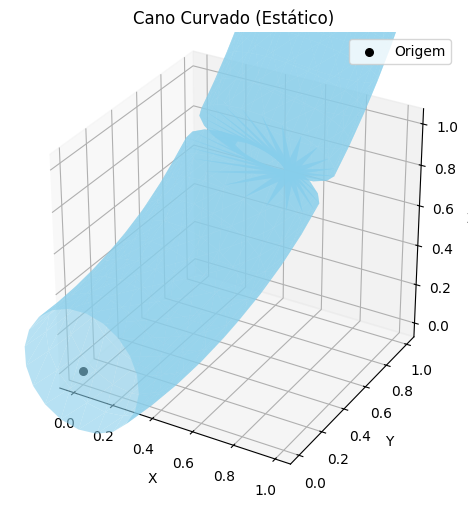

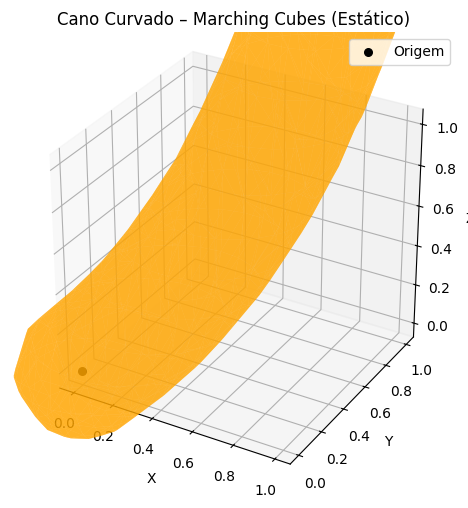

In [10]:
plot_mesh_matplotlib(V1, F1, "Cano Curvado (Estático)", "skyblue")

plot_mesh_matplotlib(V2, F2, "Cano Curvado – Marching Cubes (Estático)", "orange")

In [11]:
def obter_matriz_cano_curvado():
    """
    Gera a matriz de vértices e a lista de arestas (faces triangulares)
    de um cano curvado com base em uma curva de Bézier 3D.

    Retorna:
        V: ndarray (N x 3) de vértices
        F: lista de faces (triângulos como listas de índices)
    """
    # Pontos de controle da curva Bézier
    P0 = np.array([0, 0, 0])
    P1 = np.array([2, 0, 2])
    P2 = np.array([0, 2, 4])
    P3 = np.array([2, 2, 6])

    V, F = cano_curvado_bezier(P0, P1, P2, P3)

    return V, F
V, F = obter_matriz_cano_curvado()

print("Matriz de vértices:")
print(V)

print("\nMatriz de arestas (faces):")
print(F)


Matriz de vértices:
[[ 0.00629111 -0.29993403  0.        ]
 [ 0.07284644 -0.28385176 -0.06419949]
 [ 0.13227106 -0.2399841  -0.12211469]
 ...
 [ 1.82864758  1.82003153  6.16807646]
 [ 1.87790817  1.75468065  6.12211469]
 [ 1.93911996  1.71334333  6.06419949]]

Matriz de arestas (faces):
[[0, 20, 1], [1, 20, 21], [1, 21, 2], [2, 21, 22], [2, 22, 3], [3, 22, 23], [3, 23, 4], [4, 23, 24], [4, 24, 5], [5, 24, 25], [5, 25, 6], [6, 25, 26], [6, 26, 7], [7, 26, 27], [7, 27, 8], [8, 27, 28], [8, 28, 9], [9, 28, 29], [9, 29, 10], [10, 29, 30], [10, 30, 11], [11, 30, 31], [11, 31, 12], [12, 31, 32], [12, 32, 13], [13, 32, 33], [13, 33, 14], [14, 33, 34], [14, 34, 15], [15, 34, 35], [15, 35, 16], [16, 35, 36], [16, 36, 17], [17, 36, 37], [17, 37, 18], [18, 37, 38], [18, 38, 19], [19, 38, 39], [19, 39, 0], [0, 39, 20], [20, 40, 21], [21, 40, 41], [21, 41, 22], [22, 41, 42], [22, 42, 23], [23, 42, 43], [23, 43, 24], [24, 43, 44], [24, 44, 25], [25, 44, 45], [25, 45, 26], [26, 45, 46], [26, 46, 27],

#Item C

In [12]:
import numpy as np
import plotly.graph_objects as go
from skimage.measure import marching_cubes
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# === 1. Cilindro com malha direta ===
def cilindro(raio=1.0, altura=5.0, n_lados=50):
    theta = np.linspace(0, 2 * np.pi, n_lados, endpoint=False)
    x = raio * np.cos(theta)
    y = raio * np.sin(theta)
    z0 = np.zeros_like(x)
    z1 = np.full_like(x, altura)

    base_inferior = np.column_stack([x, y, z0])
    base_superior = np.column_stack([x, y, z1])

    V = np.vstack([base_inferior, base_superior])
    F = []

    for i in range(n_lados):
        i_next = (i + 1) % n_lados
        F.append([i, i_next, i_next + n_lados])
        F.append([i, i_next + n_lados, i + n_lados])
    return V, F

# === 2. Cilindro com marching cubes ===
def campo_escalar_cilindro(X, Y, Z, raio=1.0, altura=5.0):
    r2 = X**2 + Y**2
    dentro_altura = np.logical_and(Z >= 0, Z <= altura)
    f = r2 - raio**2
    f = np.where(dentro_altura, f, 1.0)
    return f

def gerar_malha_cilindro_marching(raio=1.0, altura=5.0, res=60):
    x = np.linspace(-1.5 * raio, 1.5 * raio, res)
    y = np.linspace(-1.5 * raio, 1.5 * raio, res)
    z = np.linspace(-1.0, altura + 1.0, res)
    X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

    vol = campo_escalar_cilindro(X, Y, Z, raio, altura)
    spacing = (x[1] - x[0], y[1] - y[0], z[1] - z[0])
    verts, faces, _, _ = marching_cubes(vol, level=0.0, spacing=spacing)
    verts += np.array([x[0], y[0], z[0]])
    return verts, faces

# === 3. Função genérica de plotagem ===
def plot_mesh_plotly(V, F, titulo="Cilindro", cor='skyblue'):
    fig = go.Figure(data=[
        go.Mesh3d(
            x=V[:, 0], y=V[:, 1], z=V[:, 2],
            i=np.array(F)[:, 0],
            j=np.array(F)[:, 1],
            k=np.array(F)[:, 2],
            color=cor,
            opacity=0.7
        )
    ])
    fig.update_layout(
        title=titulo,
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z',
            aspectmode='data'
        ),
        margin=dict(l=0, r=0, t=40, b=0)
    )
    fig.show()

def plot_mesh_matplotlib(V, F, titulo='Plot Estático', cor='skyblue'):
    fig = plt.figure(figsize=(6, 5))
    ax = fig.add_subplot(111, projection='3d')
    polys = [[V[i] for i in face] for face in F]
    mesh = Poly3DCollection(polys, alpha=0.6, facecolor=cor)
    ax.add_collection3d(mesh)
    ax.scatter(0, 0, 0, color='black', s=30, label='Origem')
    ax.set_title(titulo)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_box_aspect([1, 1, 1])
    ax.legend()
    plt.tight_layout()
    plt.show()

# === Execução Principal ===
if __name__ == "__main__":
    # 1. Cilindro com faces diretas
    V1, F1 = cilindro(raio=1.0, altura=5.0)
    plot_mesh_plotly(V1, F1, titulo="Cilindro – Malha Direta", cor='skyblue')


    # 2. Cilindro com marching cubes
    V2, F2 = gerar_malha_cilindro_marching(raio=1.0, altura=5.0)
    plot_mesh_plotly(V2, F2, titulo="Cilindro – Marching Cubes", cor='orange')


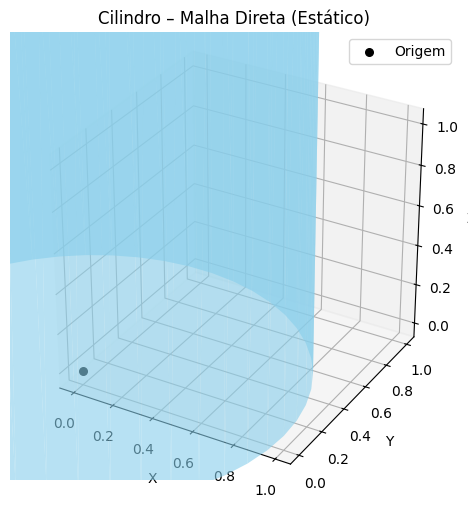

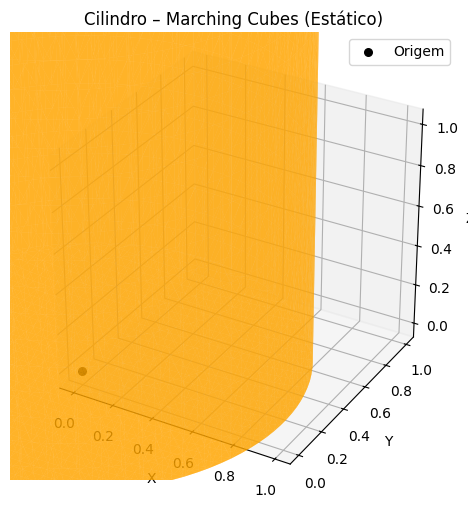

In [13]:
plot_mesh_matplotlib(V1, F1, titulo="Cilindro – Malha Direta (Estático)", cor='skyblue')
plot_mesh_matplotlib(V2, F2, titulo="Cilindro – Marching Cubes (Estático)", cor='orange')


In [14]:
import numpy as np

def gerar_cilindro(raio=1.0, altura=5.0, n_lados=50):
    """
    Retorna os vértices e arestas (faces triangulares) de um cilindro.

    Parâmetros:
        raio: raio da base circular
        altura: altura do cilindro
        n_lados: número de subdivisões circulares

    Retorna:
        vertices: ndarray (N x 3) - coordenadas dos vértices
        arestas: lista de listas - cada sublista contém 3 índices formando uma face triangular
    """
    theta = np.linspace(0, 2 * np.pi, n_lados, endpoint=False)
    x = raio * np.cos(theta)
    y = raio * np.sin(theta)
    z0 = np.zeros(n_lados)
    z1 = np.full(n_lados, altura)

    base_inferior = np.column_stack([x, y, z0])
    base_superior = np.column_stack([x, y, z1])

    vertices = np.vstack([base_inferior, base_superior])
    arestas = []

    for i in range(n_lados):
        i_prox = (i + 1) % n_lados
        # Face lateral dividida em dois triângulos
        arestas.append([i, i_prox, i_prox + n_lados])
        arestas.append([i, i_prox + n_lados, i + n_lados])

    return vertices, arestas

# Exemplo de uso:
if __name__ == "__main__":
    V, F = gerar_cilindro()
    print("Vértices:\n", V)
    print("\nArestas:\n", F)

Vértices:
 [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 9.92114701e-01  1.25333234e-01  0.00000000e+00]
 [ 9.68583161e-01  2.48689887e-01  0.00000000e+00]
 [ 9.29776486e-01  3.68124553e-01  0.00000000e+00]
 [ 8.76306680e-01  4.81753674e-01  0.00000000e+00]
 [ 8.09016994e-01  5.87785252e-01  0.00000000e+00]
 [ 7.28968627e-01  6.84547106e-01  0.00000000e+00]
 [ 6.37423990e-01  7.70513243e-01  0.00000000e+00]
 [ 5.35826795e-01  8.44327926e-01  0.00000000e+00]
 [ 4.25779292e-01  9.04827052e-01  0.00000000e+00]
 [ 3.09016994e-01  9.51056516e-01  0.00000000e+00]
 [ 1.87381315e-01  9.82287251e-01  0.00000000e+00]
 [ 6.27905195e-02  9.98026728e-01  0.00000000e+00]
 [-6.27905195e-02  9.98026728e-01  0.00000000e+00]
 [-1.87381315e-01  9.82287251e-01  0.00000000e+00]
 [-3.09016994e-01  9.51056516e-01  0.00000000e+00]
 [-4.25779292e-01  9.04827052e-01  0.00000000e+00]
 [-5.35826795e-01  8.44327926e-01  0.00000000e+00]
 [-6.37423990e-01  7.70513243e-01  0.00000000e+00]
 [-7.28968627e-01  6

#Item D

In [15]:
import numpy as np
from skimage import measure
import plotly.graph_objects as go

def generate_paralelepipedo_volume(base, altura, comprimento, resolution=30, padding=5):
    total_x = resolution + 2 * padding
    total_y = resolution + 2 * padding
    total_z = resolution + 2 * padding

    volume = np.zeros((total_x, total_y, total_z), dtype=np.uint8)

    start_x = padding
    start_y = padding
    start_z = padding

    size_x = resolution
    size_y = int(altura / base * resolution) if base != 0 else resolution
    size_z = int(comprimento / base * resolution) if base != 0 else resolution

    size_y = min(size_y, resolution)
    size_z = min(size_z, resolution)

    volume[start_x:start_x+size_x, start_y:start_y+size_y, start_z:start_z+size_z] = 1

    return volume

def create_paralelepipedo_mesh(base, altura, comprimento):
    vertices = np.array([
        [0, 0, 0],
        [base, 0, 0],
        [base, altura, 0],
        [0, altura, 0],
        [0, 0, comprimento],
        [base, 0, comprimento],
        [base, altura, comprimento],
        [0, altura, comprimento]
    ])
    faces = np.array([
        [0, 1, 2], [0, 2, 3],  # frente
        [4, 6, 5], [4, 7, 6],  # trás
        [0, 5, 1], [0, 4, 5],  # baixo
        [3, 2, 6], [3, 6, 7],  # cima
        [0, 3, 7], [0, 7, 4],  # esquerda
        [1, 5, 6], [1, 6, 2]   # direita
    ])
    return vertices, faces

def plotly_mesh(vertices, faces, title='Malha 3D'):
    i, j, k = faces[:, 0], faces[:, 1], faces[:, 2]

    mesh = go.Mesh3d(
        x=vertices[:, 0],
        y=vertices[:, 1],
        z=vertices[:, 2],
        i=i,
        j=j,
        k=k,
        opacity=0.5,
        color='lightblue',
        flatshading=True,
        name='Mesh'
    )

    fig = go.Figure(data=[mesh])
    fig.update_layout(
        title=title,
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z',
            aspectmode='data'  # mantém proporção real
        ),
        width=700,
        height=700
    )
    fig.show()

# Parâmetros
base, altura, comprimento = 2, 3, 4

# Gerar volume voxel do paralelepípedo
volume = generate_paralelepipedo_volume(base, altura, comprimento, resolution=30, padding=5)

print("Volume shape:", volume.shape)
print("Volume min value:", volume.min())
print("Volume max value:", volume.max())

# Marching cubes
verts_mc, faces_mc, normals, values = measure.marching_cubes(volume, level=0.5)

scale = np.array([
    base / (volume.shape[0] - 1),
    altura / (volume.shape[1] - 1),
    comprimento / (volume.shape[2] - 1)
])

verts_mc = verts_mc * scale

# Malha original
verts_orig, faces_orig = create_paralelepipedo_mesh(base, altura, comprimento)

# Plotar os dois gráficos interativos separadamente
plotly_mesh(verts_orig, faces_orig, title='Paralelepípedo Original (Mesh Exata)')
plotly_mesh(verts_mc, faces_mc, title='Malha após Marching Cubes')

Volume shape: (40, 40, 40)
Volume min value: 0
Volume max value: 1


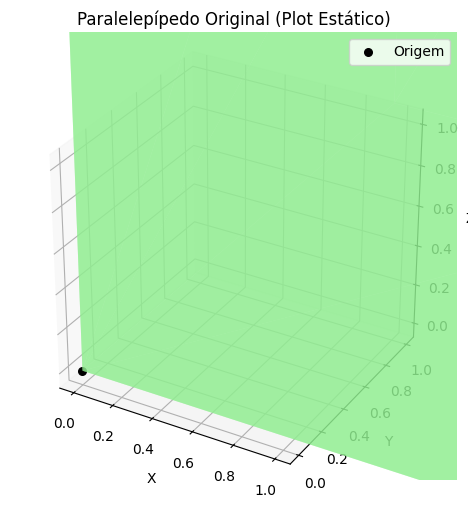

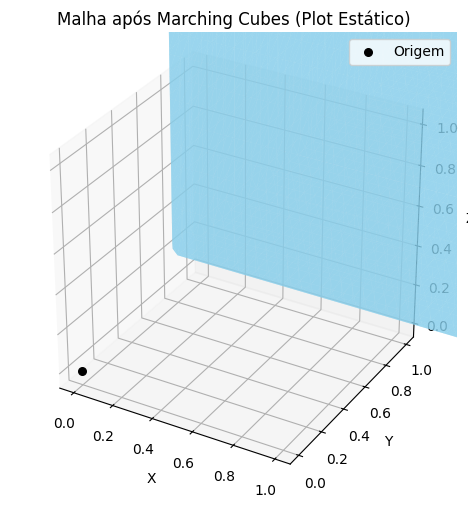

In [16]:
# --- Visualizações Estáticas com matplotlib ---

# 1. Paralelepípedo original
fig1 = plt.figure(figsize=(6, 5))
ax1 = fig1.add_subplot(111, projection='3d')
faces1 = [[verts_orig[i] for i in face] for face in faces_orig]
mesh1 = Poly3DCollection(faces1, alpha=0.6, facecolor='lightgreen')
ax1.add_collection3d(mesh1)
ax1.scatter(0, 0, 0, color='black', s=30, label='Origem')
ax1.set_title('Paralelepípedo Original (Plot Estático)')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.legend()
ax1.set_box_aspect([1, 1, 1])
plt.tight_layout()
plt.show()

# 2. Paralelepípedo após marching cubes
fig2 = plt.figure(figsize=(6, 5))
ax2 = fig2.add_subplot(111, projection='3d')
faces2 = [[verts_mc[i] for i in face] for face in faces_mc]
mesh2 = Poly3DCollection(faces2, alpha=0.6, facecolor='skyblue')
ax2.add_collection3d(mesh2)
ax2.scatter(0, 0, 0, color='black', s=30, label='Origem')
ax2.set_title('Malha após Marching Cubes (Plot Estático)')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.legend()
ax2.set_box_aspect([1, 1, 1])
plt.tight_layout()
plt.show()

#Item E

In [17]:
import numpy as np
from skimage import measure
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def create_line_volume(tamanho=4, resolution=30, padding=5):
    total = resolution + 2 * padding
    volume = np.zeros((total, total, total), dtype=np.uint8)
    start = padding
    end = padding + resolution
    y_center = total // 2
    z_center = total // 2
    volume[start:end, y_center, z_center] = 1
    return volume

def plotly_mesh(vertices, faces, title='Malha 3D'):
    i, j, k = faces[:, 0], faces[:, 1], faces[:, 2]
    mesh = go.Mesh3d(
        x=vertices[:, 0],
        y=vertices[:, 1],
        z=vertices[:, 2],
        i=i, j=j, k=k,
        opacity=0.5,
        color='lightblue',
        flatshading=True,
        name='Mesh'
    )
    fig = go.Figure(data=[mesh])
    fig.update_layout(
        title=title,
        scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z', aspectmode='data'),
        width=700, height=700
    )
    fig.show()

def plot_line(vertices, title='Linha Reta'):
    line = go.Scatter3d(
        x=vertices[:, 0], y=vertices[:, 1], z=vertices[:, 2],
        mode='lines+markers',
        marker=dict(size=5, color='red'),
        line=dict(width=4, color='blue')
    )
    fig = go.Figure(data=[line])
    fig.update_layout(
        title=title,
        scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z', aspectmode='data'),
        width=700, height=700
    )
    fig.show()

def create_linha_reta_vertices(tamanho=4):
    return np.array([[0, 0, 0], [tamanho, 0, 0]])

# Parâmetros
tamanho = 4
resolution = 30
padding = 5

# Criar volume voxelizado
volume = create_line_volume(tamanho, resolution, padding)
print("Volume shape:", volume.shape)
print("Volume min value:", volume.min())
print("Volume max value:", volume.max())

# Marching cubes
verts_mc, faces_mc, normals, values = measure.marching_cubes(volume, level=0.5)
scale = np.array([tamanho / (volume.shape[0] - 1)] * 3)
verts_mc = verts_mc * scale

# Criar linha simples
verts_line = create_linha_reta_vertices(tamanho)

# --- Visualização Interativa ---
plot_line(verts_line, title='Linha Reta Original (2 Vértices)')
plotly_mesh(verts_mc, faces_mc, title='Linha após Marching Cubes')


Volume shape: (40, 40, 40)
Volume min value: 0
Volume max value: 1


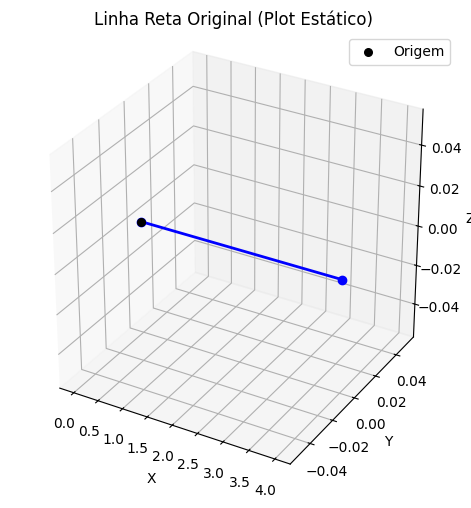

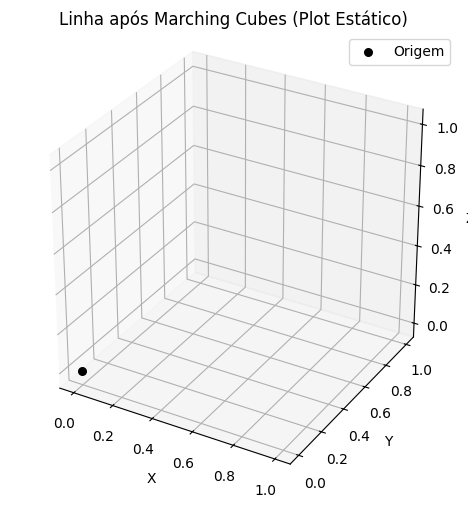

In [18]:
# --- Plotagem Estática com Matplotlib ---

# 1. Linha original
fig1 = plt.figure(figsize=(6, 5))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.plot(verts_line[:, 0], verts_line[:, 1], verts_line[:, 2],
         color='blue', linewidth=2, marker='o', markersize=6)
ax1.scatter(0, 0, 0, color='black', s=30, label='Origem')
ax1.set_title('Linha Reta Original (Plot Estático)')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.legend()
ax1.set_box_aspect([1, 1, 1])
plt.tight_layout()
plt.show()

# 2. Linha após marching cubes
fig2 = plt.figure(figsize=(6, 5))
ax2 = fig2.add_subplot(111, projection='3d')
polys = [[verts_mc[i] for i in face] for face in faces_mc]
mesh = Poly3DCollection(polys, alpha=0.6, facecolor='lightblue')
ax2.add_collection3d(mesh)
ax2.scatter(0, 0, 0, color='black', s=30, label='Origem')
ax2.set_title('Linha após Marching Cubes (Plot Estático)')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.legend()
ax2.set_box_aspect([1, 1, 1])
plt.tight_layout()
plt.show()


#**Questão 02**

In [19]:
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from skimage.measure import marching_cubes

# --- Utilitários ---
def aplicar_transformacoes(V, escala=1.0, rotacao=None, translacao=(0, 0, 0)):
    V = V * escala
    if rotacao is not None:
        V = V @ rotacao.T
    V = V + np.array(translacao)
    return V

def plotar_multimalhas_plotly(lista_meshes, titulo="Cena com Sólidos 3D"):
    fig = go.Figure()
    for V, F, cor, nome in lista_meshes:
        fig.add_trace(go.Mesh3d(
            x=V[:, 0], y=V[:, 1], z=V[:, 2],
            i=np.array(F)[:, 0],
            j=np.array(F)[:, 1],
            k=np.array(F)[:, 2],
            color=cor,
            opacity=0.7,
            name=nome
        ))
    fig.update_layout(
        title=titulo,
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z',
            aspectmode='data'
        ),
        margin=dict(l=0, r=0, t=40, b=0)
    )
    fig.show()

# --- Importar as funções definidas anteriormente ---

# - cano_reto, gerar_malha_parede_interna
# - cano_curvado_bezier, gerar_malha_marching
# - cilindro, gerar_malha_cilindro_marching
# - create_paralelepipedo_mesh
# - create_linha_reta_vertices, create_line_volume

# --- Gerar os sólidos e aplicar transformações ---

# 1. Cano Reto
V1, F1 = gerar_malha_parede_interna()
V1 = aplicar_transformacoes(V1, escala=0.8, translacao=(0, 0, 0))

# 2. Cano Curvado
P0 = np.array([0, 0, 0])
P1 = np.array([2, 0, 2])
P2 = np.array([0, 2, 4])
P3 = np.array([2, 2, 6])
V2, F2 = gerar_malha_marching(P0, P1, P2, P3, res=40)
V2 = aplicar_transformacoes(V2, escala=0.6, translacao=(4, 0, 0))

# 3. Cilindro
V3, F3 = gerar_malha_cilindro_marching(raio=1.0, altura=5.0)
V3 = aplicar_transformacoes(V3, escala=0.7, translacao=(0, 5, 0))

# 4. Paralelepípedo
V4, F4 = create_paralelepipedo_mesh(base=2, altura=3, comprimento=4)
V4 = aplicar_transformacoes(V4, escala=1.5, translacao=(5, 5, 0))

# 5. Linha Reta
tamanho = 4
volume_linha = create_line_volume(tamanho=tamanho, resolution=30, padding=5)
V5, F5, _, _ = marching_cubes(volume_linha, level=0.5)
escala_voxel = np.array([tamanho / (volume_linha.shape[0] - 1)] * 3)
V5 = V5 * escala_voxel
V5 = aplicar_transformacoes(V5, escala=1.5, translacao=(2, 2, 4))

# --- Plotar tudo junto ---
todas_malhas = [
    (V1, F1, "orange", "Cano Reto"),
    (V2, F2, "skyblue", "Cano Curvado"),
    (V3, F3, "green", "Cilindro"),
    (V4, F4, "purple", "Paralelepípedo"),
    (V5, F5, "red", "Linha Reta")
]

# Gráfico interativo
plotar_multimalhas_plotly(todas_malhas, titulo="Cena com Sólidos 3D")


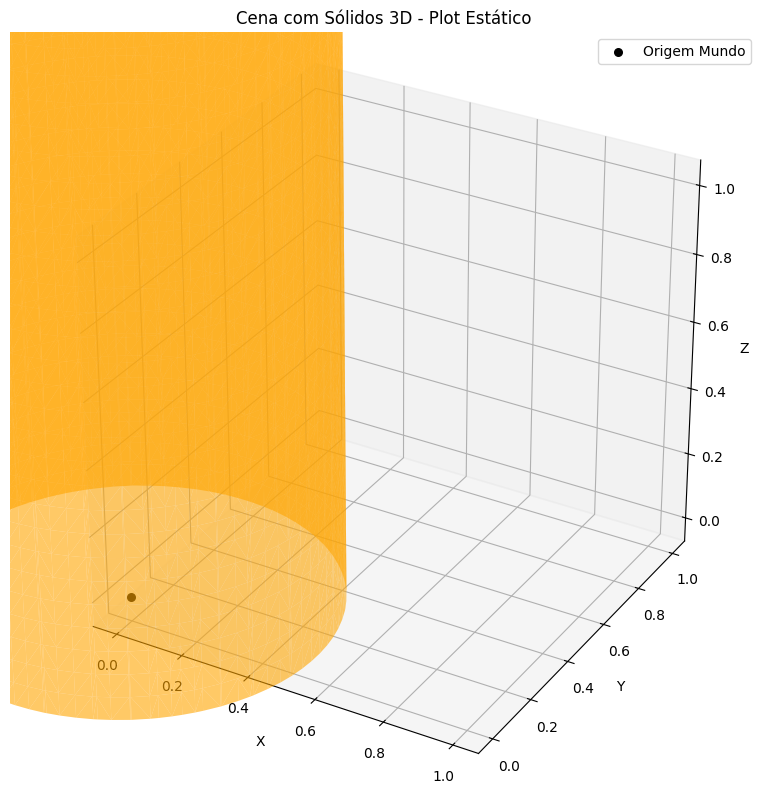

In [20]:

# --- Plot estático com matplotlib ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for V, F, cor, nome in todas_malhas:
    faces = [[V[i] for i in face] for face in F]
    mesh = Poly3DCollection(faces, alpha=0.6)
    mesh.set_facecolor(cor)
    ax.add_collection3d(mesh)

ax.set_title("Cena com Sólidos 3D - Plot Estático")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.scatter(0, 0, 0, color='black', s=30, label='Origem Mundo')
ax.legend()
ax.set_box_aspect([1, 1, 1])
plt.tight_layout()
plt.show()


#Questão 3

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import plotly.graph_objects as go

# --- 3) Sistema de Coordenadas da Câmera ---
# a) Calcular centroide da cena e definir ponto ideal de visualização:
todos_vertices = np.concatenate([V for V, _, _, _ in todas_malhas])
centroide = np.mean(todos_vertices, axis=0)
C = centroide + np.array([10.0, 0.0, 0.0])  # câmera a 10 unidades na direção X
P = centroide                               # ponto para onde a câmera olha
up_world = np.array([0.0, 0.0, 1.0])

# b) Calcular base vetorial (u, v, w):
w = (C - P)
w /= np.linalg.norm(w)
u = np.cross(up_world, w)
u /= np.linalg.norm(u)
v = np.cross(w, u)

# Matriz de rotação R (linhas = [u; v; w])
R = np.stack([u, v, w], axis=0)

# Função para converter vértices do mundo para a câmera
def world_to_camera(V):
    trans = V - C       # translação
    return (R @ trans.T).T  # rotação

# c) Transformar cada sólido
camera_meshes = []
for V, F, cor, nome in todas_malhas:
    Vc = world_to_camera(V)
    camera_meshes.append((Vc, F, cor, nome))

# --- Plot interativo com Plotly ---
fig = go.Figure()

for Vc, Fc, cor, nome in camera_meshes:
    fig.add_trace(go.Mesh3d(
        x=Vc[:,0], y=Vc[:,1], z=Vc[:,2],
        i=Fc[:,0], j=Fc[:,1], k=Fc[:,2],
        color=cor, opacity=0.5, name=nome
    ))

# Origem do mundo em coordenadas da câmera
orig_cam = world_to_camera(np.array([[0.0, 0.0, 0.0]]))[0]
fig.add_trace(go.Scatter3d(
    x=[orig_cam[0]], y=[orig_cam[1]], z=[orig_cam[2]],
    mode='markers+text', marker=dict(size=5, color='black'),
    text=['Origem Mundo'], textposition='bottom center', showlegend=False
))

# Origem da câmera no próprio sistema (0,0,0)
fig.add_trace(go.Scatter3d(
    x=[0], y=[0], z=[0],
    mode='markers+text', marker=dict(size=5, color='red'),
    text=['Origem Câmera'], textposition='top center', showlegend=False
))

fig.update_layout(
    title='Cena no Sistema da Câmera (Visualização Ideal)',
    scene=dict(xaxis_title='X_cam', yaxis_title='Y_cam', zaxis_title='Z_cam'),
    margin=dict(l=0, r=0, b=0, t=30)
)
fig.show()

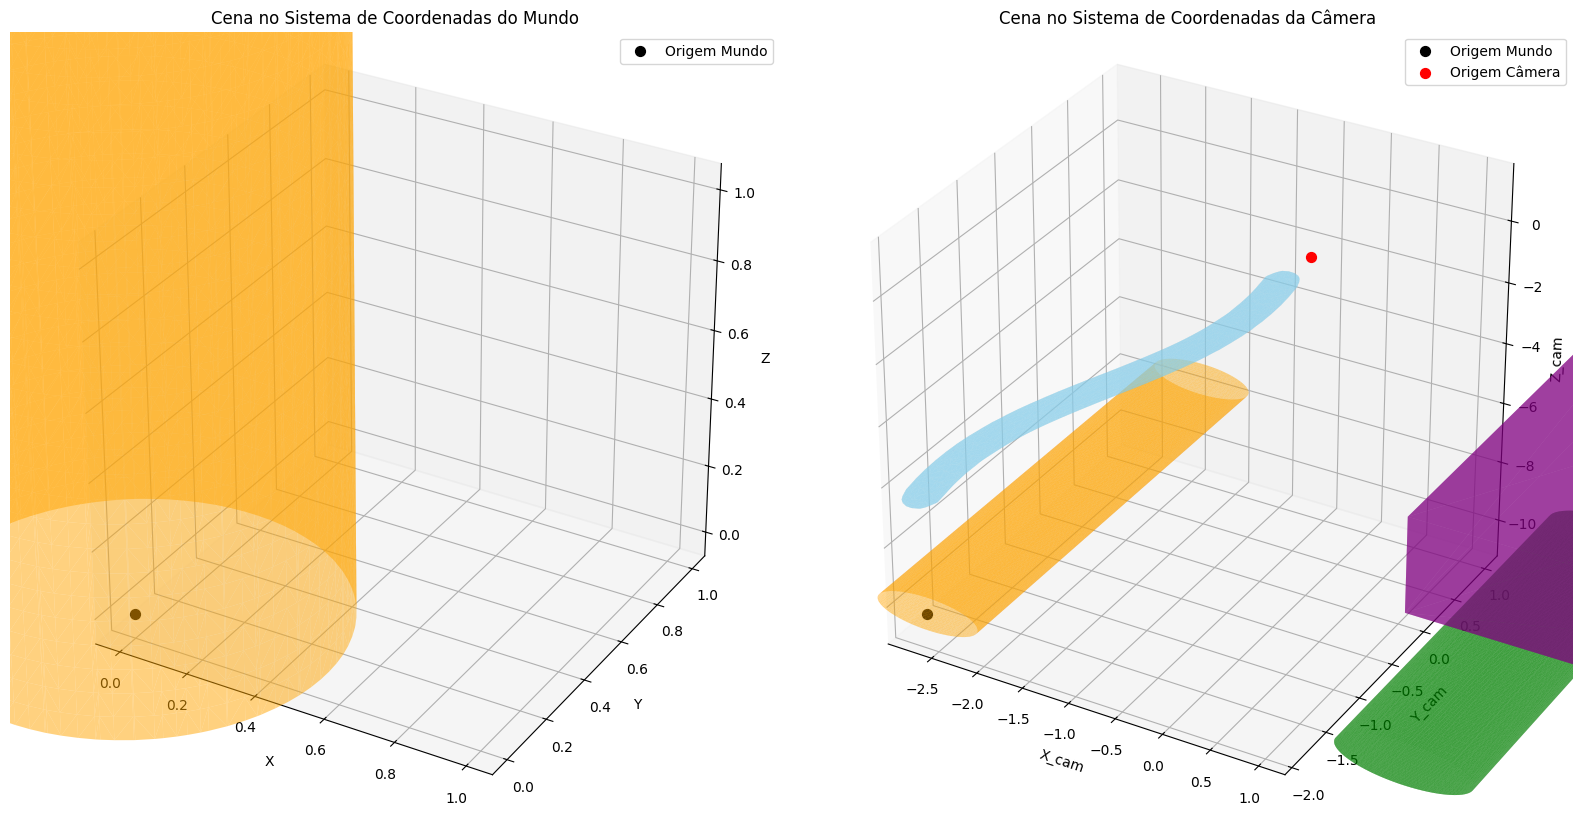

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# --- 3) Sistema de Coordenadas da Câmera ---
# a) Definir origem da câmera (C), ponto de interesse (P) e vetor up do mundo:
todos_vertices = np.concatenate([V for V, _, _, _ in todas_malhas])
centroide = np.mean(todos_vertices, axis=0)

C = centroide + np.array([10.0, 0.0, 0.0])  # olhar de frente, a 10 unidades
P = centroide
up_world = np.array([0.0, 0.0, 1.0])



# b) Calcular base vetorial (u, v, w):
w = (C - P)
w /= np.linalg.norm(w)
u = np.cross(up_world, w)
u /= np.linalg.norm(u)
v = np.cross(w, u)

# Matriz de rotação R (linhas = [u; v; w])
R = np.stack([u, v, w], axis=0)

# Função para converter vértices do mundo para a câmera
def world_to_camera(V):
    trans = V - C       # translação
    return (R @ trans.T).T  # rotação

# c) Transformar cada sólido
camera_meshes = []
for V, F, cor, nome in todas_malhas:
    Vc = world_to_camera(V)
    camera_meshes.append((Vc, F, cor, nome))

# --- Plotagem: antes e depois da transformação ---
fig = plt.figure(figsize=(16, 8))

# Plot original no mundo
ax1 = fig.add_subplot(121, projection='3d')
for V, F, cor, nome in todas_malhas:
    faces = [[V[i] for i in face] for face in F]
    mesh = Poly3DCollection(faces, alpha=0.5)
    mesh.set_facecolor(cor)
    ax1.add_collection3d(mesh)
ax1.scatter(0, 0, 0, color='black', s=50, label='Origem Mundo')
ax1.set_title('Cena no Sistema de Coordenadas do Mundo')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.legend()
ax1.set_box_aspect([1,1,1])

# Plot transformado no sistema da câmera
ax2 = fig.add_subplot(122, projection='3d')
for Vc, Fc, cor, nome in camera_meshes:
    faces = [[Vc[i] for i in face] for face in Fc]
    mesh = Poly3DCollection(faces, alpha=0.5)
    mesh.set_facecolor(cor)
    ax2.add_collection3d(mesh)

# Origem do mundo em coords da câmera (ponto preto)
orig_cam = world_to_camera(np.array([[0.0, 0.0, 0.0]]))[0]
ax2.scatter(orig_cam[0], orig_cam[1], orig_cam[2], color='black', s=50, label='Origem Mundo')

# Origem da câmera no seu próprio sistema (0,0,0) (ponto vermelho)
ax2.scatter(0, 0, 0, color='red', s=50, label='Origem Câmera')

ax2.set_xlabel('X_cam')
ax2.set_ylabel('Y_cam')
ax2.set_zlabel('Z_cam')
ax2.set_title('Cena no Sistema de Coordenadas da Câmera')
ax2.legend()
ax2.set_box_aspect([1,1,1])

plt.tight_layout()
plt.show()


#Questão 04

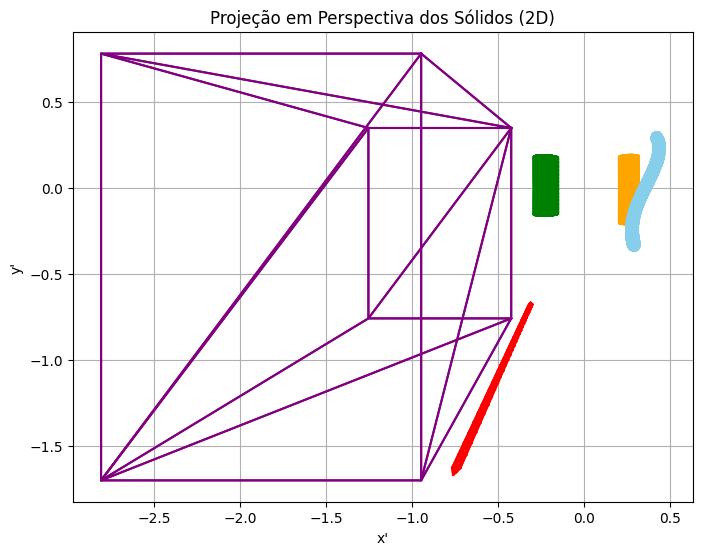

In [23]:
import matplotlib.pyplot as plt

# --- Projeção em Perspectiva ---
f = 1.0  # distância focal (pode ajustar para zoom)

# Função de projeção em perspectiva
def perspective_projection(Vc):
    x, y, z = Vc[:, 0], Vc[:, 1], Vc[:, 2]
    # Evitar divisão por zero
    z = np.where(z == 0, 1e-6, z)
    x_proj = f * x / z
    y_proj = f * y / z
    return np.stack([x_proj, y_proj], axis=-1)

# --- Plot 2D após projeção ---
fig2, ax = plt.subplots(figsize=(8, 8))
for Vc, Fc, cor, nome in camera_meshes:
    Vproj = perspective_projection(Vc)
    for face in Fc:
        pontos = Vproj[face]
        # Fechar o polígono ligando o último ao primeiro ponto
        pontos = np.vstack([pontos, pontos[0]])
        ax.plot(pontos[:, 0], pontos[:, 1], color=cor)

ax.set_title("Projeção em Perspectiva dos Sólidos (2D)")
ax.set_xlabel("x'")
ax.set_ylabel("y'")
ax.set_aspect('equal')
plt.grid(True)
plt.show()

#Questão 05

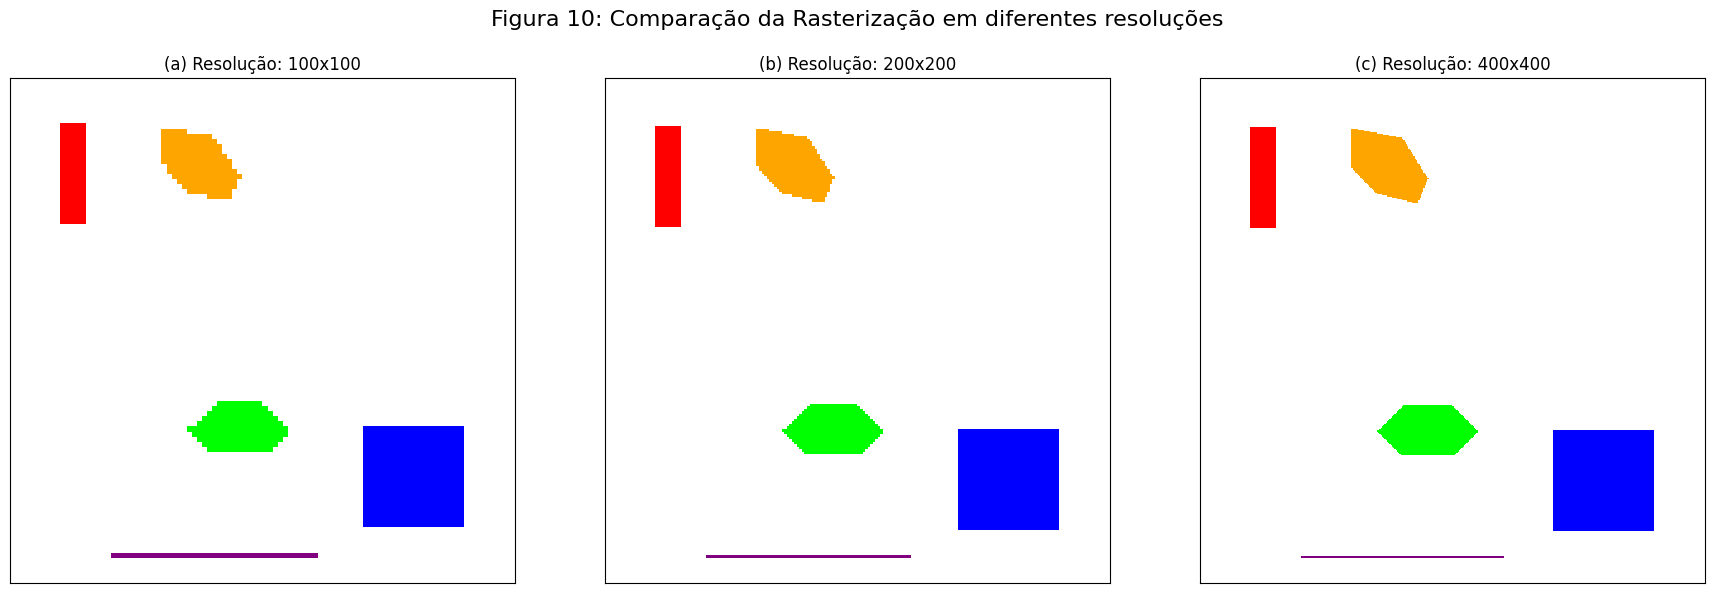

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Cores RGB dos objetos
CORES = {
    'cano_reto': (255, 0, 0),
    'cano_curvado': (255, 165, 0),
    'cilindro': (0, 255, 0),
    'paralelepipedo': (0, 0, 255),
    'linha_reta': (128, 0, 128),
}

# Formas geométricas em coordenadas normalizadas (0 a 10)
objetos = {
    'cano_reto': [np.array([[1, 1], [1.5, 1], [1.5, 3], [1, 3]])],
    'cano_curvado': [np.array([[3, 1], [4, 1.2], [4.5, 2], [4.3, 2.5], [3.5, 2.3], [3, 1.8]])],
    'cilindro': [np.array([[3.5, 7], [4, 7.5], [5, 7.5], [5.5, 7], [5, 6.5], [4, 6.5]])],
    'paralelepipedo': [np.array([[7, 7], [9, 7], [9, 9], [7, 9]])],
    'linha_reta': [np.array([[2, 9.5], [6, 9.5]])]
}

# Verifica se ponto está dentro de um polígono 2D
def ponto_dentro_poligono(px, py, vertices):
    dentro = False
    j = len(vertices) - 1
    for i in range(len(vertices)):
        xi, yi = vertices[i]
        xj, yj = vertices[j]
        if ((yi > py) != (yj > py)) and \
           (px < (xj - xi) * (py - yi) / (yj - yi + 1e-10) + xi):
            dentro = not dentro
        j = i
    return dentro

# Rasteriza a cena para uma determinada resolução
def rasterizar(objetos, resolucao):
    framebuffer = np.ones((resolucao, resolucao, 3), dtype=np.uint8) * 255
    escala = resolucao / 10

    for nome, formas in objetos.items():
        cor = np.array(CORES[nome], dtype=np.uint8)

        for forma in formas:
            forma_px = [(int(v[0]*escala), int((10-v[1])*escala)) for v in forma]

            # Caso linha reta
            if len(forma) == 2:
                x0, y0 = forma_px[0]
                x1, y1 = forma_px[1]
                n = max(abs(x1 - x0), abs(y1 - y0))
                for i in range(n + 1):
                    xi = int(x0 + i*(x1 - x0)/n)
                    yi = int(y0 + i*(y1 - y0)/n)
                    if 0 <= xi < resolucao and 0 <= yi < resolucao:
                        framebuffer[yi, xi] = cor
                continue

            # Rasterização poligonal
            xs = [v[0] for v in forma_px]
            ys = [v[1] for v in forma_px]
            min_x, max_x = max(min(xs), 0), min(max(xs), resolucao - 1)
            min_y, max_y = max(min(ys), 0), min(max(ys), resolucao - 1)

            for x in range(min_x, max_x+1):
                for y in range(min_y, max_y+1):
                    px_norm = x / escala
                    py_norm = 10 - (y / escala)
                    if ponto_dentro_poligono(px_norm, py_norm, forma):
                        framebuffer[y, x] = cor

    return framebuffer

# Plotagem das imagens
resolucoes = [100, 200, 400]
titulos = ['(a) Resolução: 100x100', '(b) Resolução: 200x200', '(c) Resolução: 400x400']

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, res in enumerate(resolucoes):
    img = rasterizar(objetos, res)
    axs[i].imshow(img, extent=[0, 10, 0, 10], interpolation='nearest', origin='lower')
    axs[i].set_title(titulos[i], fontsize=12)
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].set_xlim(0, 10)
    axs[i].set_ylim(0, 10)
    axs[i].set_aspect('equal')

plt.suptitle('Figura 10: Comparação da Rasterização em diferentes resoluções', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()